In [1]:
##Necessary imports..
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(color_codes = True)
%matplotlib inline

Using TensorFlow backend.


In [2]:
##Fetching the data
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 3.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [3]:
file = drive.CreateFile({'id':'1ZcQcLGKEffGwDPGRIbQK9rrQfP-_m_av'})
file.GetContentFile('creditcardfraud.zip')
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
##Loading the CSV file...
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
##Settiong options 
pd.options.display.max_columns = 50
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
##data description

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0    99.827251
1     0.172749
Name: Class, dtype: float64 %


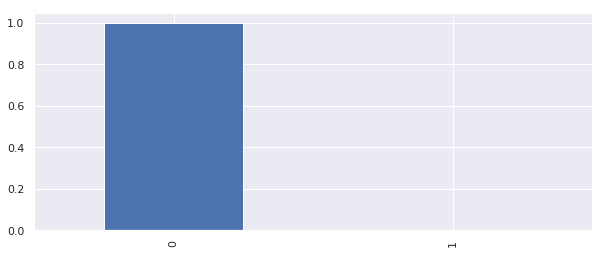

In [9]:
##Target class distribution..
print(df['Class'].value_counts(normalize = True)*100)
df['Class'].value_counts(normalize = True).plot.bar(figsize = (10,4))

(0.0, 172792.0)

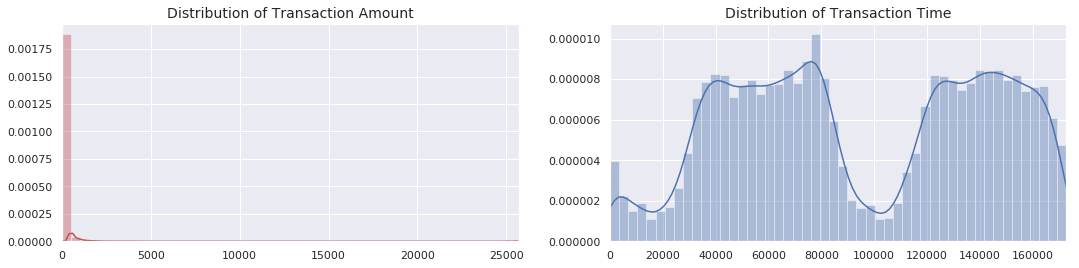

In [10]:
##Distribution of Transcation time and Transaction amount..
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


In [3]:
##Scalling time...
df["Time"] = df["Time"].apply(lambda x : x / 3600 % 24)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
##Scaling time and amount..
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.719153,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-1.719153,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.719121,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-1.719121,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.719090,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#Designing AutoEncoder.

In [5]:
##taking only non_fraud cases..
non_fraud = df[df.Class == 0].sample(1000)
fraud = df[df.Class == 1]

print("Shape of non-fraud dataset is {}".format(non_fraud.shape))
print("Shape of fraud dataset is {}".format(fraud.shape))

Shape of non-fraud dataset is (1000, 31)
Shape of fraud dataset is (492, 31)


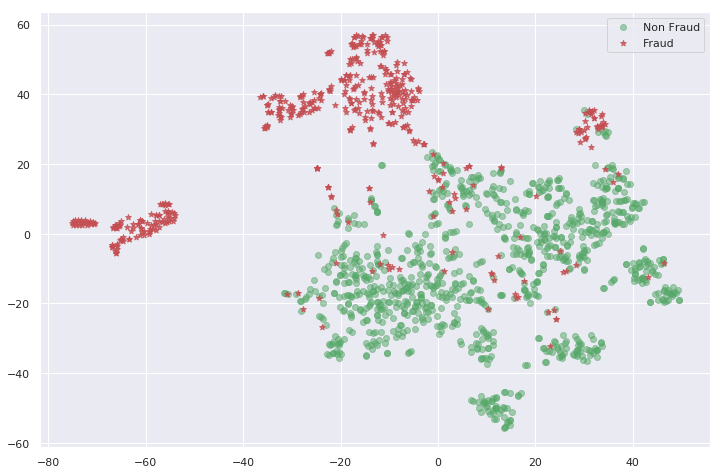

In [7]:
##Visualizing fraud and non-fraud transactions...
from sklearn.manifold import TSNE

def tsne_plot(x1, y1):
    tsne = TSNE(n_components=2,perplexity = 30, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.5, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='*', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best')
    plt.show()
    
df_tsne = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)    
X = df_tsne.drop(['Class'], axis = 1).values
Y = df_tsne["Class"].values
    
tsne_plot(X, Y)

In [0]:
import tensorflow as tf
## input layer 
input_layer = tf.keras.layers.Input(shape=(X.shape[1],))

## encoding part
encoded = tf.keras.layers.Dense(100, activation='tanh', activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_layer)
#encoded = tf.keras.layers.Dropout(0.2)(encoded)
encoded = tf.keras.layers.Dense(50, activation='relu')(encoded)

## decoding part
decoded = tf.keras.layers.Dense(50, activation='tanh')(encoded)
#decoded = tf.keras.layers.Dropout(0.2)(decoded)
decoded = tf.keras.layers.Dense(100, activation='tanh')(decoded)

## output layer
output_layer = tf.keras.layers.Dense(X.shape[1], activation='relu')(decoded)


In [21]:
autoencoder = tf.keras.Model(input_layer,output_layer)
autoencoder.compile(optimizer = "adam",loss = "mse")

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                3030      
Total params: 18,830
Trainable params: 18,830
Non-trainable params: 0
_________________________________________________________________


In [0]:
##Input for the autoencoder..
x = df.drop(["Class"], axis=1)
y = df["Class"].values

x_norm, x_fraud = x[y == 0], x[y == 1]


In [26]:
##Fitting our model...
history = autoencoder.fit(x, x, 
                batch_size = 512, epochs = 30, 
                shuffle = True, validation_split = 0.20)

Train on 227845 samples, validate on 56962 samples
Epoch 1/30
227845/227845 [==============================] - 2s 10us/sample - loss: 0.7406 - val_loss: 0.7209
Epoch 2/30
227845/227845 [==============================] - 2s 10us/sample - loss: 0.6801 - val_loss: 0.6834
Epoch 3/30
227845/227845 [==============================] - 2s 10us/sample - loss: 0.6561 - val_loss: 0.6656
Epoch 4/30
227845/227845 [==============================] - 2s 10us/sample - loss: 0.6470 - val_loss: 0.6842
Epoch 5/30
227845/227845 [==============================] - 2s 10us/sample - loss: 0.6421 - val_loss: 0.6491
Epoch 6/30
227845/227845 [==============================] - 2s 10us/sample - loss: 0.6324 - val_loss: 0.6424
Epoch 7/30
227845/227845 [==============================] - 2s 10us/sample - loss: 0.6291 - val_loss: 0.6687
Epoch 8/30
227845/227845 [==============================] - 2s 10us/sample - loss: 0.6305 - val_loss: 0.6372
Epoch 9/30
227845/227845 [==============================] - 2s 10us/sample - 

#Latent Representations..

In [0]:
##getting our latent representations...
hidden_representation = tf.keras.models.Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [0]:
##getting the prediction..
norm_hid_rep = hidden_representation.predict(x_norm[:4000])
fraud_hid_rep = hidden_representation.predict(x_fraud)

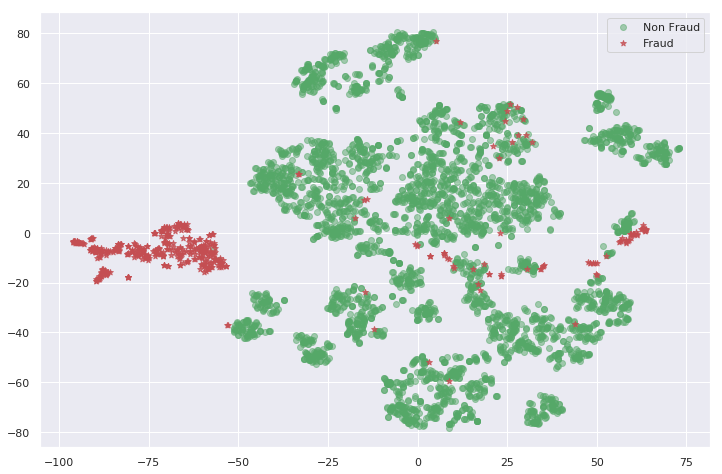

In [29]:
##Visualization..
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y)

#Final Supervised Model..

In [0]:
##necessary imports...
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [32]:
##Logistic Regression..
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)


from sklearn.metrics import classification_report,accuracy_score
print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1000
         1.0       0.99      0.93      0.96       123

   micro avg       0.99      0.99      0.99      1123
   macro avg       0.99      0.97      0.98      1123
weighted avg       0.99      0.99      0.99      1123


Accuracy Score:  0.9919857524487978


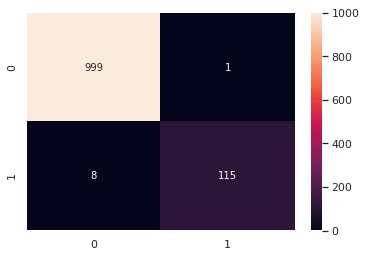

In [35]:
##Using confusion matrics...
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(val_y,pred_y),annot = True,fmt = 'd')

In [45]:
##Using Random Forest..
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500,max_depth = 5).fit(train_x,train_y)

pred_rf = rf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_rf))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_rf))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1000
         1.0       0.99      0.89      0.94       123

   micro avg       0.99      0.99      0.99      1123
   macro avg       0.99      0.94      0.96      1123
weighted avg       0.99      0.99      0.99      1123


Accuracy Score:  0.9866429207479964


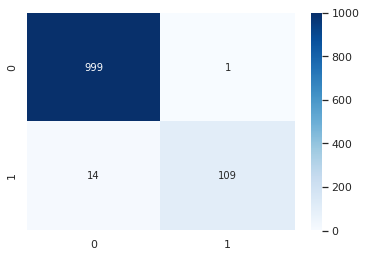

In [46]:
sns.heatmap(confusion_matrix(val_y,pred_rf),annot = True,fmt = 'd',cmap = 'Blues')

In [47]:
##using SVM
sv = SVC(kernel = 'rbf').fit(train_x,train_y)

pred_sv = sv.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_sv))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_sv))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1000
         1.0       0.99      0.88      0.93       123

   micro avg       0.99      0.99      0.99      1123
   macro avg       0.99      0.94      0.96      1123
weighted avg       0.99      0.99      0.99      1123


Accuracy Score:  0.9857524487978628


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


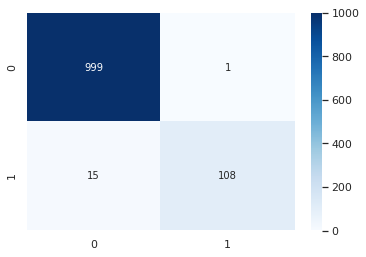

In [49]:
sns.heatmap(confusion_matrix(val_y,pred_sv),annot = True,fmt = 'd',cmap = 'Blues')

#HYPER-PARAMETER OPTIMIZATION

In [53]:
##Using grid-search CV  for SVM
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
degrees = [2,3]
param_grid = {'C': Cs, 'gamma' : gammas,'degree':degrees}
grid_svc = GridSearchCV(estimator = sv,
                        param_grid = param_grid,
                       scoring = 'recall',
                       cv = 3,
                       verbose = 1)
grid_svc.fit(train_x,train_y)

print(grid_svc.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 10, 'degree': 2, 'gamma': 0.1}


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   20.5s finished


In [55]:
##Training SVC with these parameters..
sv_op = SVC(C = 10,degree = 2,kernel = 'rbf',gamma = 0.1).fit(train_x,train_y)
pred_sv_op = sv_op.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_sv_op))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_sv_op))


Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       0.99      0.98      0.98       123

   micro avg       1.00      1.00      1.00      1123
   macro avg       0.99      0.99      0.99      1123
weighted avg       1.00      1.00      1.00      1123


Accuracy Score:  0.9964381121994658


In [0]:
##Using Grid Search CV for Random Forset..
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
param_grid = { 
    'n_estimators': [200, 500,700,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_rf = GridSearchCV(estimator = rf,
                        param_grid = param_grid,
                       scoring = 'recall',
                       cv = 3,
                       verbose = 1)
grid_rf.fit(train_x,train_y)

print(grid_rf.best_params_)


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1000
         1.0       0.99      0.89      0.94       123

   micro avg       0.99      0.99      0.99      1123
   macro avg       0.99      0.94      0.96      1123
weighted avg       0.99      0.99      0.99      1123


Accuracy Score:  0.9866429207479964


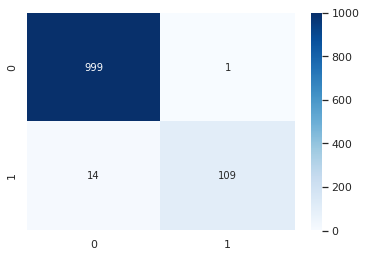

In [65]:
##Fitting randomforest..
rf_op = RandomForestClassifier(n_estimators = 500,max_depth = 5,criterion = 'gini',max_features = 'sqrt').fit(train_x,train_y)
pred_rf_op = rf_op.predict(val_x)


##getting the classification report
print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_rf_op))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_rf_op))


##getting the confusion matrix..
sns.heatmap(confusion_matrix(val_y,pred_rf_op),annot = True,fmt = 'd',cmap = 'Blues')

#VOTING CLASSIFIER(Final Model)

In [0]:
from sklearn.ensemble import VotingClassifier
classifiers = [('Logistic Regression',clf),
              ('SVM',sv_op),
              ('Random Forest',rf_op)]

vc = VotingClassifier(estimators = classifiers,
                     voting = 'hard').fit(train_x,train_y)
pred_vc = vc.predict(val_x)


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1000
         1.0       0.99      0.94      0.97       123

   micro avg       0.99      0.99      0.99      1123
   macro avg       0.99      0.97      0.98      1123
weighted avg       0.99      0.99      0.99      1123


Accuracy Score:  0.9928762243989314


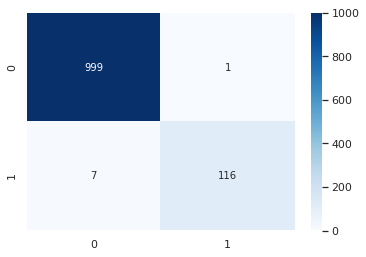

In [71]:
##Classification report..
print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_vc))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_vc))


##Plotting the confusion matrix...
sns.heatmap(confusion_matrix(val_y,pred_vc),annot = True,cmap = 'Blues',fmt = 'd')

#ROC Curve

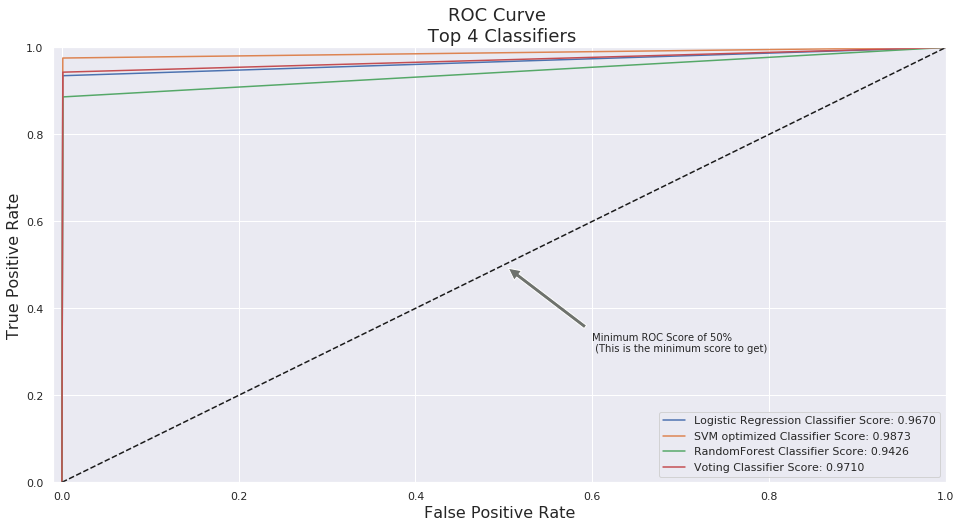

In [77]:
from sklearn.metrics import roc_curve,roc_auc_score
##for logistic regression
log_fpr, log_tpr, log_thresold = roc_curve(val_y, pred_y)
##for optimized svc
svc_fpr, svc_tpr, scv_threshold = roc_curve(val_y, pred_sv_op)
##for optimized rf
rf_fpr, rf_tpr, rf_threshold = roc_curve(val_y,pred_rf_op)
##for voting classifier
vote_fpr, vote_tpr, vote_threshold = roc_curve(val_y, pred_vc)


def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rf_fpr,rf_tpr,vote_fpr, vote_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(val_y, pred_y)))
    plt.plot(svc_fpr, svc_tpr, label='SVM optimized Classifier Score: {:.4f}'.format(roc_auc_score(val_y, pred_sv_op)))
    plt.plot(rf_fpr, rf_tpr, label='RandomForest Classifier Score: {:.4f}'.format(roc_auc_score(val_y, pred_rf_op)))
    plt.plot(vote_fpr,vote_tpr, label='Voting Classifier Score: {:.4f}'.format(roc_auc_score(val_y,pred_vc)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rf_fpr,rf_tpr,vote_fpr, vote_tpr)
plt.show()